In [6]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

##### Importing the Data


In [7]:
winedata = pd.read_csv("/home/dheerus/Desktop/Python/Wine Data Prediction/winequality-red.csv")
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
winedata.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [10]:
winedata["fixed acidity"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: fixed acidity
Non-Null Count  Dtype  
--------------  -----  
1599 non-null   float64
dtypes: float64(1)
memory usage: 12.6 KB


##### Visualizing the data

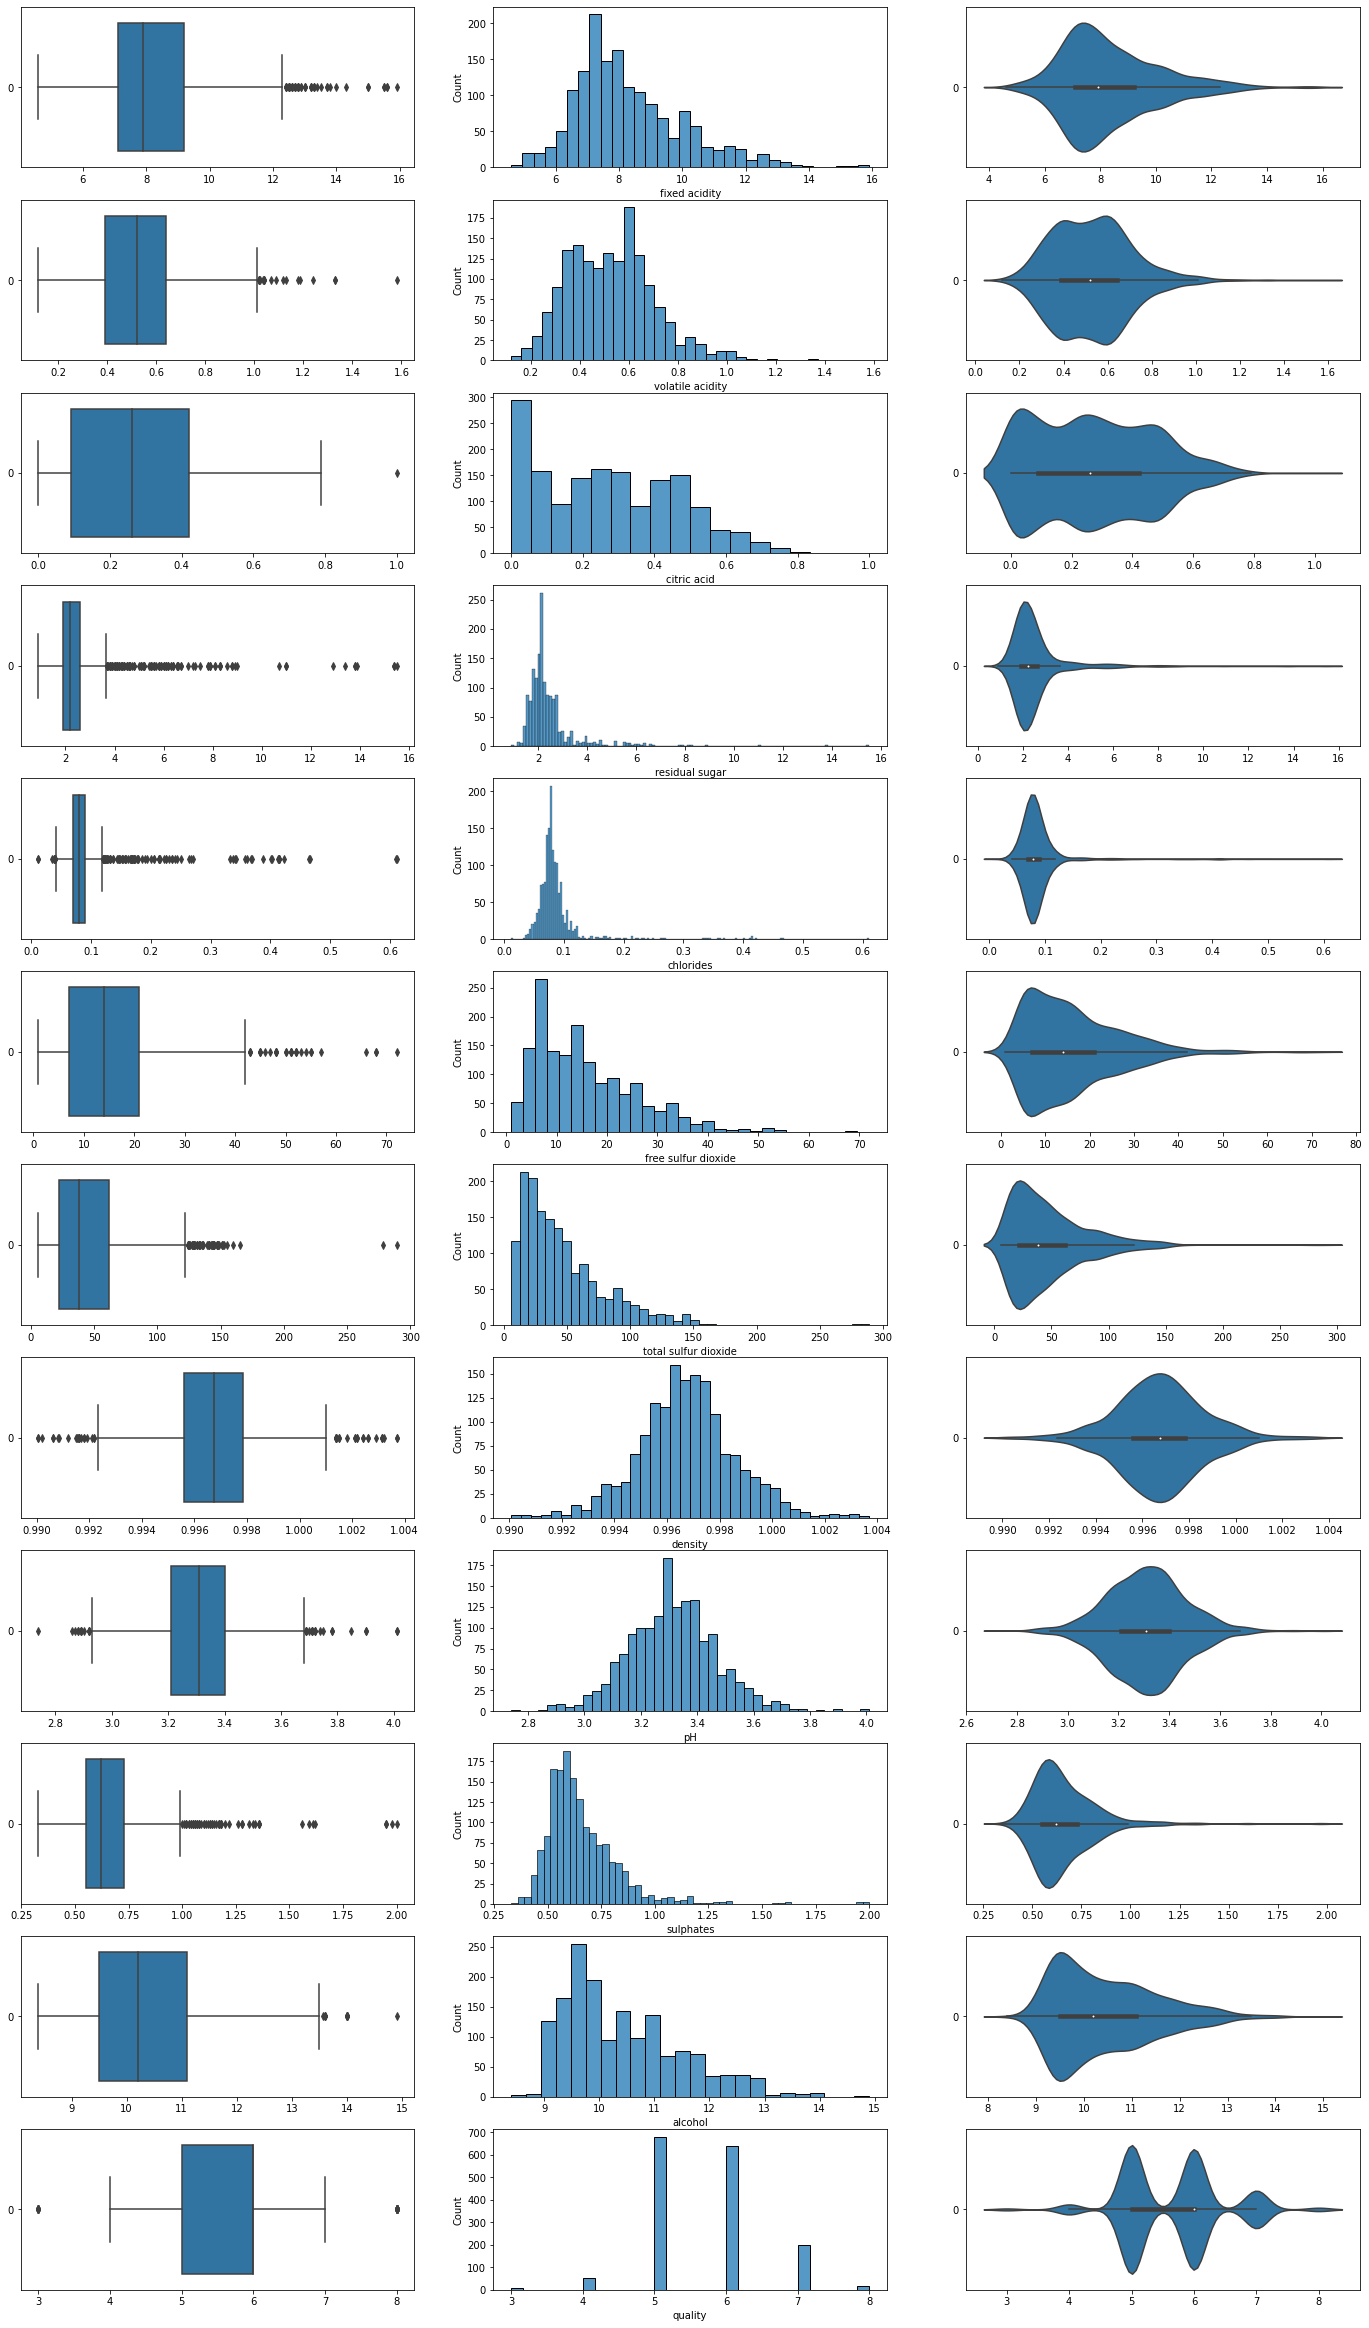

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier

f, axes = plt.subplots(12, 3, figsize=(24, 42))
count = 0
for var in winedata:
    sb.boxplot(data = winedata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = winedata[var], ax = axes[count,1])
    sb.violinplot(data = winedata[var], orient = "h", ax = axes[count,2])
    count += 1

##### Drawing the correlation matrix 

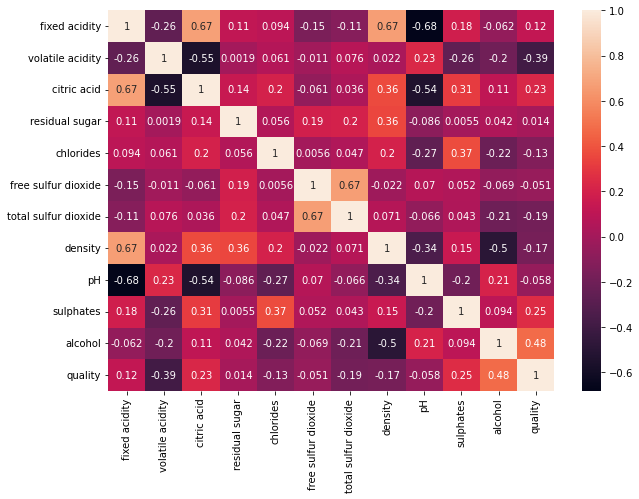

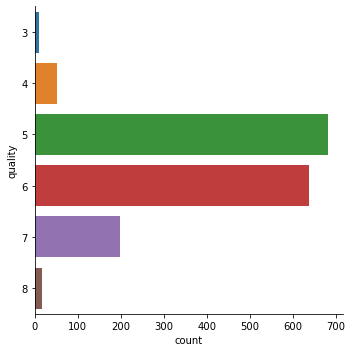

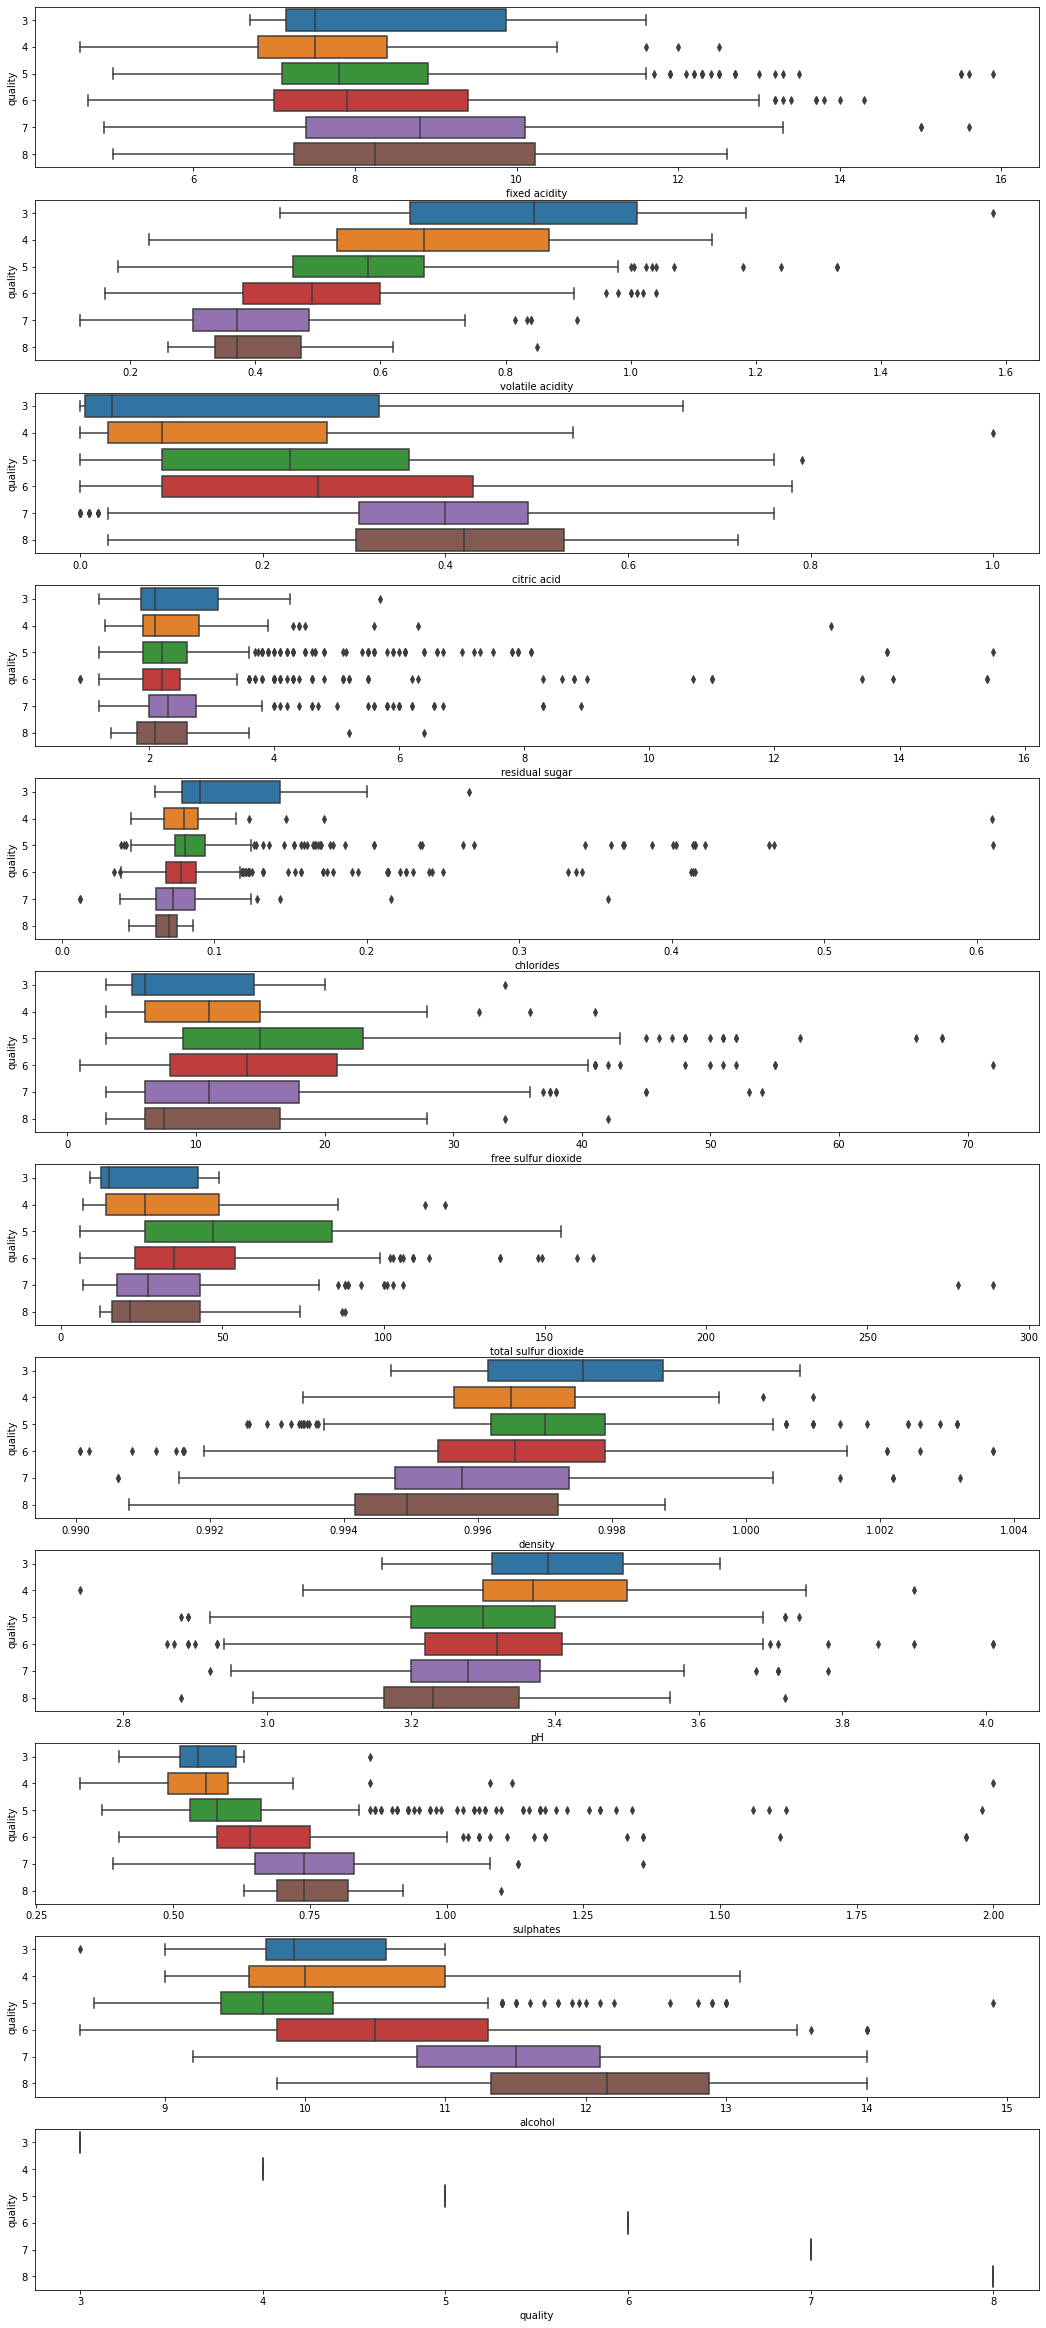

In [12]:
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(winedata.corr() , annot = True , ax = ax)
plt.show()
sb.catplot(y = "quality", data = winedata, kind = "count")
f, axes = plt.subplots(12, 1, figsize=(18, 42))

count = 0
for var in winedata:
    sb.boxplot(x = var, y = "quality", data = winedata, orient = "h", ax = axes[count])
    count += 1
q1=winedata.quantile(0.25)
q2=winedata.quantile(0.75)
IQR=q2-q1

##### Splitting the data for further analysis

In [13]:
winedata=winedata[((winedata<(q1-1.5*IQR))|(winedata>(q2+1.5*IQR))).any(axis=1)]
y = pd.DataFrame(winedata["quality"])
X = pd.DataFrame(winedata[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide","total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### Using Decision Tree to train the data with max depth of 5.

In [15]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=5)

##### Training the model.

In [16]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [23]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train)*100,"%")
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 73.80952380952381 %



In [22]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test)*100,"%")
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 50.0 %



#### Confusion matrix

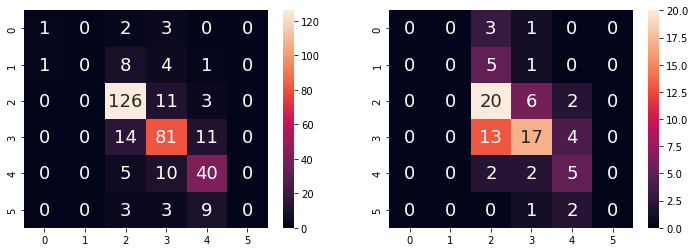

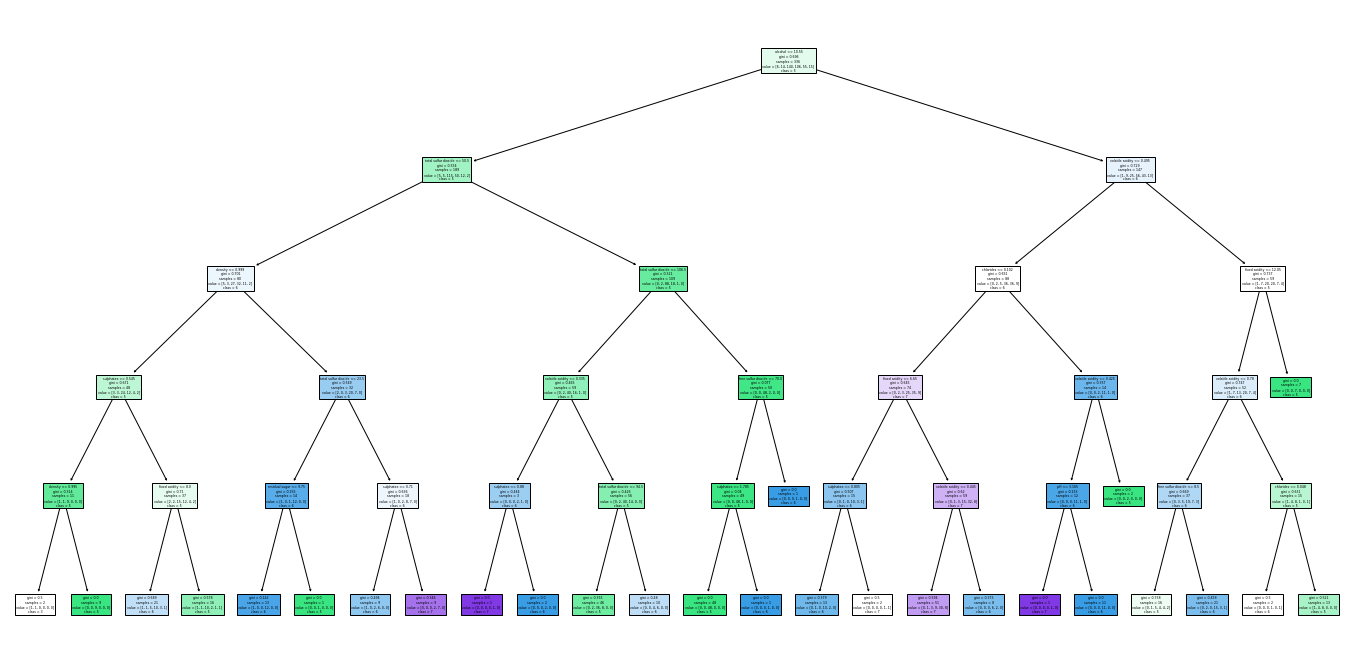

In [19]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

#### Prediciting the quality of the wine

Quality of Red Wine:  2
bad     338
good     82
Name: quality category, dtype: int64


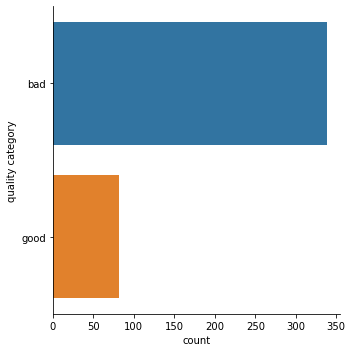

In [20]:
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
winedata = winedata.reindex(columns=winedata.columns.tolist() + ['quality category'])
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
winedata['quality category'] = pd.cut(winedata['quality'], bins = bins, labels = group_names)
winedata.head()
print("Quality of Red Wine: ",len(winedata["quality category"].unique()))


print(winedata["quality category"].value_counts())
sb.catplot(y = "quality category", data = winedata, kind = "count")